In [586]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import anderson_ksamp
from scipy import stats
import matplotlib.pyplot as plt 
from itertools import combinations
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Raw Data

In [587]:
#import data
wfidf_sp_scores = pd.read_excel('scores_wfidf_raw.xlsx', index_col=0)

#Set up and drop columns
scores_raw = wfidf_sp_scores.copy()
tickers = scores_raw['ticker'].to_list()
scores_raw = scores_raw.drop(columns=['ticker'])
scores_raw.head()

,innovation,integrity,quality,respect,teamwork
0,39.715914,17.536791,41.987613,9.581187,23.755850
1,47.539685,19.752828,65.696622,14.877453,43.878597
2,15.794388,2.009696,3.547135,3.110285,37.554562
3,25.191359,5.299777,26.445060,5.163449,11.192057
4,40.293203,17.684172,54.018857,9.884953,30.389047


In [588]:
scores_raw.describe()

,innovation,integrity,quality,respect,teamwork
count,5411.000000,5411.000000,5411.000000,5411.000000,5411.000000
mean,47.822802,16.018320,47.816620,11.267039,32.343900
std,37.059694,15.768085,30.779789,15.565019,22.980339
min,0.000000,0.000000,0.334028,0.000000,0.114075
25%,27.786445,7.279746,30.100098,4.623172,19.111222
50%,39.912959,11.849020,41.344101,7.885853,27.689385
75%,56.863115,19.465071,56.240916,12.605979,38.654842
max,539.320625,276.110789,418.934670,300.708476,276.170046


In [589]:
# Description of raw data
scores_raw.describe().round(3).to_excel('scores_raw.xlsx')

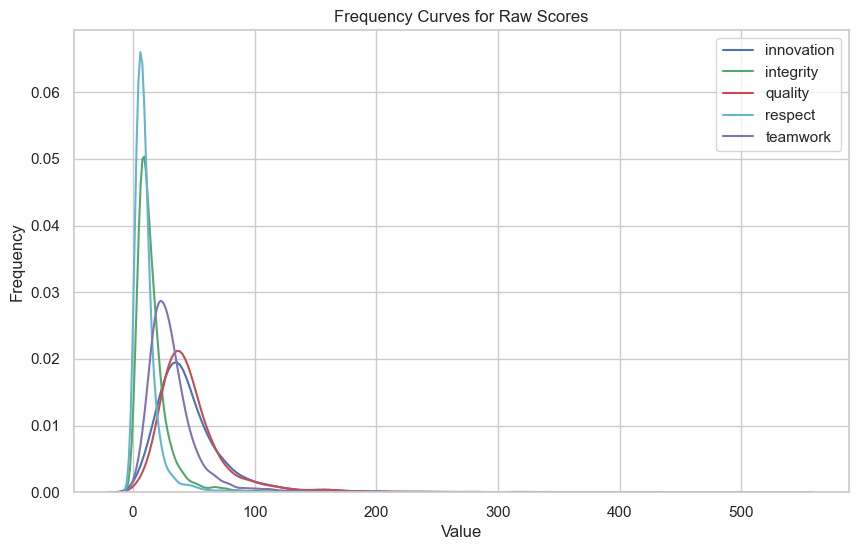

In [590]:
plt.figure(figsize=(10, 6))

#Define colour and lables
colors = ['b', 'g', 'r', 'c', 'm']
labels = scores_raw.columns

# Cycle through columns to plot
for i, column in enumerate(scores_raw.columns):
    variable = scores_raw[column]
    
    # Plot the Curves
    sns.kdeplot(variable, color=colors[i], label=labels[i])

plt.title('Frequency Curves for Raw Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# Log Scores

In [591]:
# Ensure the input DataFrame contains only numerical values
if not np.issubdtype(scores_raw.values.dtype, np.number):
    raise ValueError("DataFrame should contain only numerical values.")

# Apply the natural logarithm transformation
scores_log = scores_raw.applymap(lambda x: np.log(x) if x > 0 else np.nan)

In [592]:
# Description of log transformed data
scores_log.describe()

,innovation,integrity,quality,respect,teamwork
count,5410.000000,5374.000000,5411.000000,5336.000000,5411.000000
mean,3.659483,2.466610,3.704366,2.019615,3.287154
std,0.665910,0.799837,0.593190,0.912805,0.634295
min,-1.121902,-0.814883,-1.096531,-2.697673,-2.170897
25%,3.324771,1.993408,3.404528,1.554938,2.950276
50%,3.686723,2.477274,3.721930,2.075497,3.321049
75%,4.040677,2.972083,4.029645,2.540872,3.654672
max,6.290310,5.620802,6.037715,5.706141,5.621017


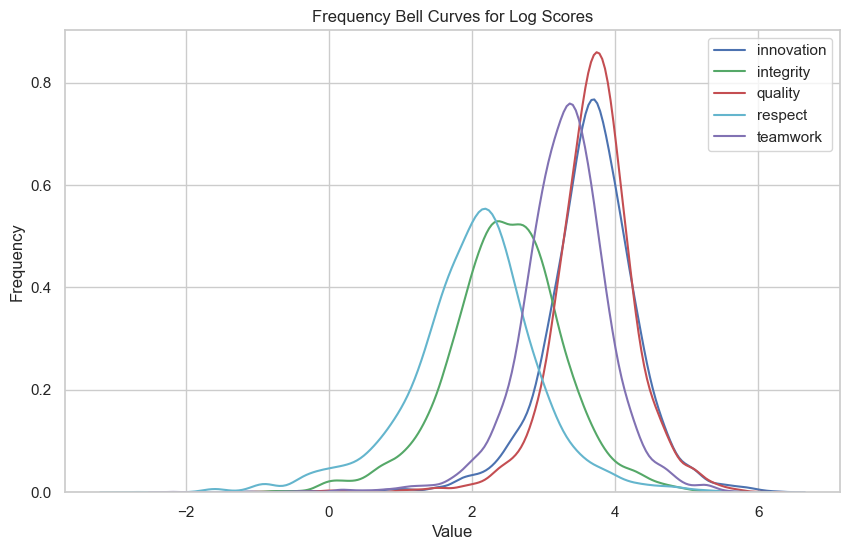

In [593]:
# Plot the bell curves
plt.figure(figsize=(10, 6))

#Define colour and lables
colors = ['b', 'g', 'r', 'c', 'm']
labels = scores_log.columns

# Cycle through columns to plot
for i, column in enumerate(scores_log.columns):
    variable = scores_log[column]
    
    # Plot the Curves
    sns.kdeplot(variable, color=colors[i], label=labels[i])

plt.title('Frequency Bell Curves for Log Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# Clipped Scores

In [594]:
# clipping deata (replacing values above a certain threshold with the threshold value)
scores_log_clipped = scores_log.copy()

# Define cutoff values for each column
cutoffs = {
    'innovation': 1.5,
    'integrity': -1,
    'quality': 1.5,
    'respect': -1,
    'teamwork': 1.5
}

for column, cutoff in cutoffs.items():
    scores_log_clipped = scores_log_clipped[scores_log_clipped[column] >= cutoff]

In [595]:
# Description of clipped data
scores_log_clipped.describe()

,innovation,integrity,quality,respect,teamwork
count,5229.000000,5229.000000,5229.000000,5229.000000,5229.000000
mean,3.706439,2.496981,3.746125,2.054379,3.335204
std,0.592450,0.779357,0.523165,0.870081,0.558371
min,1.500143,-0.814883,1.670890,-0.910370,1.511403
25%,3.359753,2.029219,3.436035,1.580648,2.986211
50%,3.703398,2.503978,3.741558,2.093211,3.334540
75%,4.058133,2.985905,4.041979,2.552124,3.666855
max,6.290310,5.620802,6.037715,5.706141,5.621017


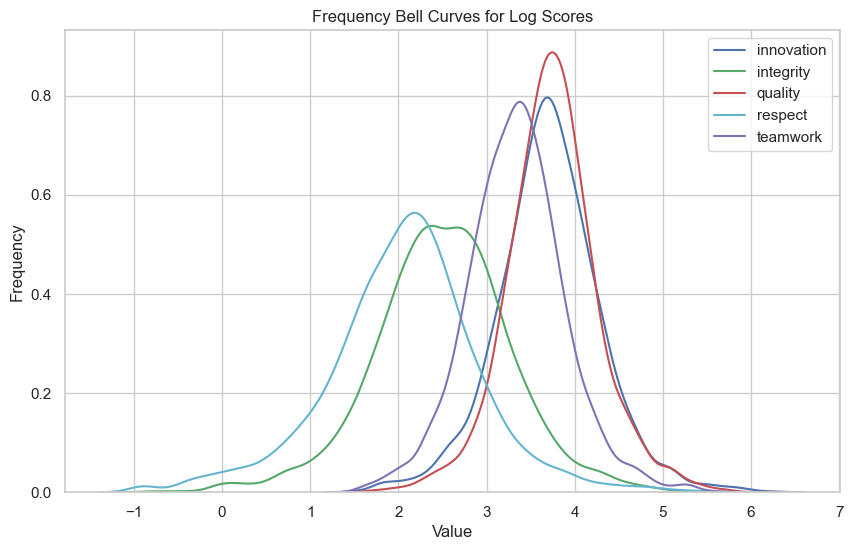

In [596]:
# Plot the bell curves
plt.figure(figsize=(10, 6))

#Define colour and lables
colors = ['b', 'g', 'r', 'c', 'm']
labels = scores_log.columns

# Cycle through columns to plot
for i, column in enumerate(scores_log_clipped.columns):
    variable = scores_log_clipped[column]
    
    # Plot the Curves
    sns.kdeplot(variable, color=colors[i], label=labels[i])

plt.title('Frequency Bell Curves for Log Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# Scaled Log Scores

In [597]:
#Define Scalers
scaleMinMax = MinMaxScaler(feature_range=(0, 10))
scaleStandard = StandardScaler()

In [598]:
# Scaling Log Scores with Standard Scaler
log_scores_standard = scaleStandard.fit_transform(scores_log) # Fit and transform the raw scores

# Convert the scaled scores to a DataFrame
log_scores_standard = pd.DataFrame(log_scores_standard, columns=scores_raw.columns) # Convert the scaled scores to a DataFrame

In [599]:
log_scores_standard.describe()

,innovation,integrity,quality,respect,teamwork
count,5.410000e+03,5.374000e+03,5.411000e+03,5.336000e+03,5.411000e+03
mean,-1.467711e-16,-1.282520e-16,-1.019657e-15,2.024035e-16,7.255126e-17
std,1.000092e+00,1.000093e+00,1.000092e+00,1.000094e+00,1.000092e+00
min,-7.180895e+00,-4.103082e+00,-8.094109e+00,-5.168390e+00,-8.605702e+00
25%,-5.026854e-01,-5.916771e-01,-5.055141e-01,-5.091129e-01,-5.311554e-01
50%,4.091129e-02,1.333362e-02,2.961109e-02,6.122618e-02,5.344251e-02
75%,5.724942e-01,6.320282e-01,5.484051e-01,5.711032e-01,5.794652e-01
max,3.951093e+00,3.943909e+00,3.933927e+00,4.039059e+00,3.679798e+00


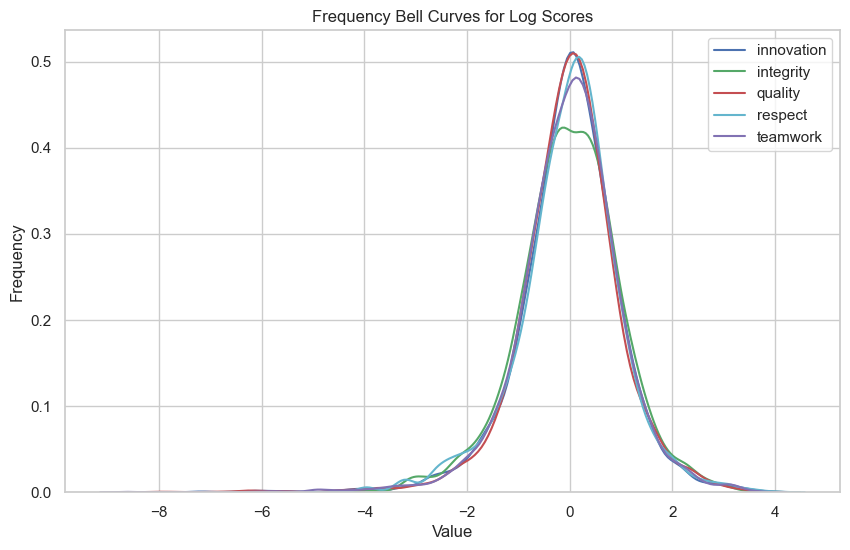

In [600]:
# Plot the bell curves
plt.figure(figsize=(10, 6))

#Define colour and lables
colors = ['b', 'g', 'r', 'c', 'm']
labels = log_scores_standard.columns

# Cycle through columns to plot
for i, column in enumerate(log_scores_standard.columns):
    variable = log_scores_standard[column]
    
    # Plot the Curves
    sns.kdeplot(variable, color=colors[i], label=labels[i])

plt.title('Frequency Bell Curves for Log Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

## MinMax

In [601]:
# Scaling Clipped Log Scores with MinMax Scaler
log_scores_stand_minmax = scaleMinMax.fit_transform(log_scores_standard) # Fit and transform the raw scores

# Convert the scaled scores to a DataFrame
log_scores_stand_minmax = pd.DataFrame(log_scores_stand_minmax, columns=scores_raw.columns) # Convert the scaled scores to a DataFrame

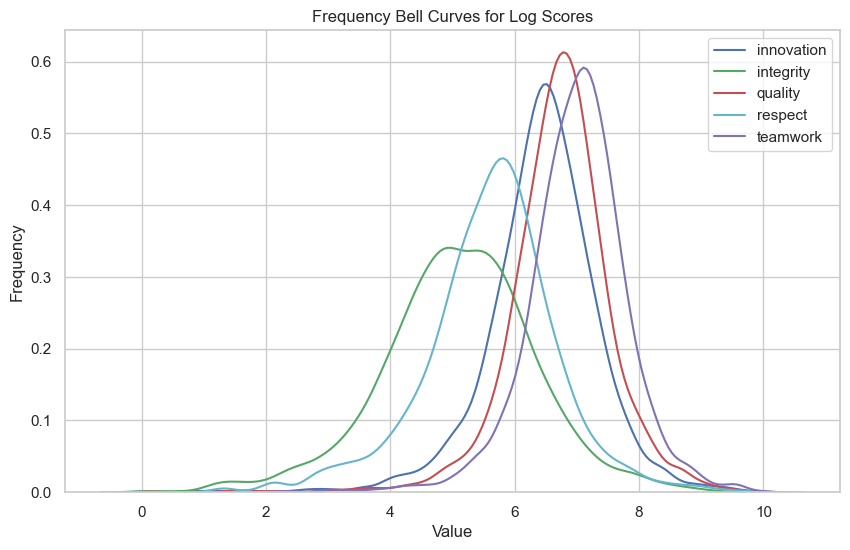

In [602]:
# Plot the bell curves
plt.figure(figsize=(10, 6))

#Define colour and lables
colors = ['b', 'g', 'r', 'c', 'm']
labels = log_scores_stand_minmax.columns

# Cycle through columns to plot
for i, column in enumerate(log_scores_stand_minmax.columns):
    variable = log_scores_stand_minmax[column]
    
    # Plot the Curves
    sns.kdeplot(variable, color=colors[i], label=labels[i])

plt.title('Frequency Bell Curves for Log Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [603]:
# add tickers to identify companies
log_scores_standard['tickers'] = wfidf_sp_scores['ticker'] # Add the tickers back to the DataFrame

# Scaled Clipped Log Scores

In [604]:
# Scaling Clipped Log Scores with Standard Scaler
log_scores_clipped_standard = scaleStandard.fit_transform(scores_log_clipped) # Fit and transform the raw scores

# Convert the scaled scores to a DataFrame
log_scores_clipped_standard = pd.DataFrame(log_scores_clipped_standard, columns=scores_raw.columns) # Convert the scaled scores to a DataFrame

In [605]:
log_scores_clipped_standard.describe().round(3)

,innovation,integrity,quality,respect,teamwork
count,5229.000,5229.000,5229.000,5229.000,5229.000
mean,0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-3.724,-4.250,-3.967,-3.408,-3.267
25%,-0.585,-0.600,-0.593,-0.545,-0.625
50%,-0.005,0.009,-0.009,0.045,-0.001
75%,0.594,0.627,0.566,0.572,0.594
max,4.362,4.009,4.381,4.197,4.094


In [606]:
log_scores_clipped_standard += 4.3 # Add 4 to all values to make them positive

In [607]:
log_scores_clipped_standard.describe().round(3)

,innovation,integrity,quality,respect,teamwork
count,5229.000,5229.000,5229.000,5229.000,5229.000
mean,4.300,4.300,4.300,4.300,4.300
std,1.000,1.000,1.000,1.000,1.000
min,0.576,0.050,0.333,0.892,1.033
25%,3.715,3.700,3.707,3.755,3.675
50%,4.295,4.309,4.291,4.345,4.299
75%,4.894,4.927,4.866,4.872,4.894
max,8.662,8.309,8.681,8.497,8.394


In [629]:
log_scores_clipped_standard.describe().round(3).to_excel('scores_post_descriptives.xlsx')

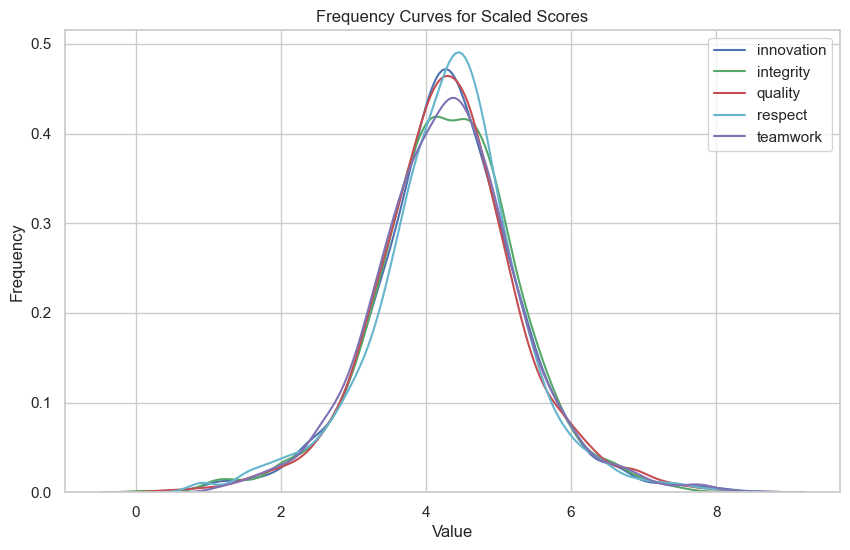

In [609]:
# 
# Plot the bell curves
plt.figure(figsize=(10, 6))

#Define colour and lables
colors = ['b', 'g', 'r', 'c', 'm']
labels = log_scores_clipped_standard.columns

# Cycle through columns to plot
for i, column in enumerate(log_scores_clipped_standard.columns):
    variable = log_scores_clipped_standard[column]
    
    # Plot the Curves
    sns.kdeplot(variable, color=colors[i], label=labels[i])

plt.title('Frequency Curves for Scaled Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()


# Scaled (MinMax) Clipped Log Scores

In [610]:
# Scaling Clipped Log Scores with MinMax Scaler
log_scores_clipped_stand_minmax = scaleMinMax.fit_transform(log_scores_clipped_standard) # Fit and transform the raw scores

# Convert the scaled scores to a DataFrame
log_scores_clipped_stand_minmax = pd.DataFrame(log_scores_clipped_stand_minmax, columns=scores_raw.columns) # Convert the scaled scores to a DataFrame

In [611]:
log_scores_clipped_stand_minmax.describe()

,innovation,integrity,quality,respect,teamwork
count,5229.000000,5229.000000,5229.000000,5229.000000,5229.000000
mean,4.605884,5.146094,4.752275,4.480835,4.437890
std,1.236804,1.210994,1.198045,1.315014,1.358694
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.882140,4.419268,4.042169,3.764852,3.588678
50%,4.599536,5.156965,4.741817,4.539523,4.436275
75%,5.340084,5.905802,5.429777,5.233112,5.244902
max,10.000000,10.000000,10.000000,10.000000,10.000000


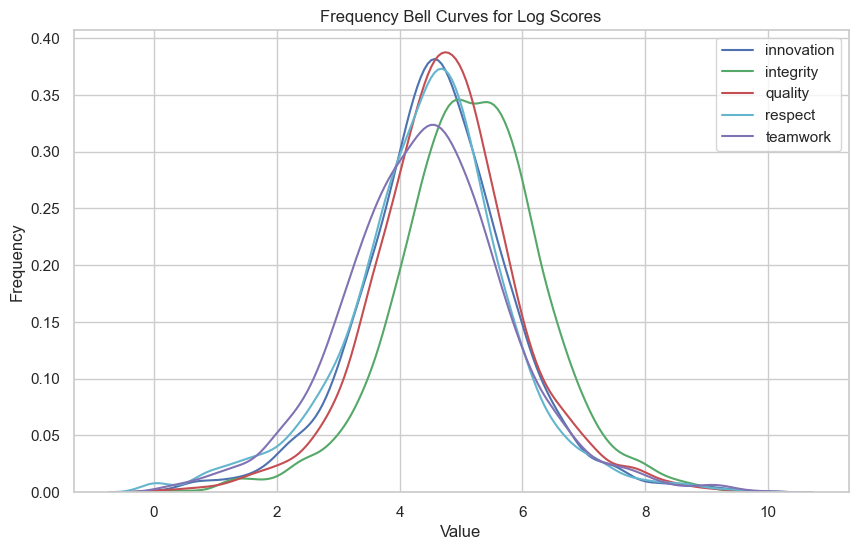

In [612]:
# Plot the bell curves
plt.figure(figsize=(10, 6))

#Define colour and lables
colors = ['b', 'g', 'r', 'c', 'm']
labels = log_scores_clipped_stand_minmax.columns

# Cycle through columns to plot
for i, column in enumerate(log_scores_clipped_stand_minmax.columns):
    variable = log_scores_clipped_stand_minmax[column]
    
    # Plot the Curves
    sns.kdeplot(variable, color=colors[i], label=labels[i])

plt.title('Frequency Bell Curves for Log Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [613]:
#add tickers to identify companies
log_scores_clipped_standard['tickers'] = wfidf_sp_scores['ticker'] # Add the tickers back to the DataFrame
log_scores_clipped_stand_minmax['tickers'] = wfidf_sp_scores['ticker'] # Add the tickers back to the DataFrame

In [614]:
log_scores_clipped_stand_minmax.describe()

,innovation,integrity,quality,respect,teamwork
count,5229.000000,5229.000000,5229.000000,5229.000000,5229.000000
mean,4.605884,5.146094,4.752275,4.480835,4.437890
std,1.236804,1.210994,1.198045,1.315014,1.358694
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.882140,4.419268,4.042169,3.764852,3.588678
50%,4.599536,5.156965,4.741817,4.539523,4.436275
75%,5.340084,5.905802,5.429777,5.233112,5.244902
max,10.000000,10.000000,10.000000,10.000000,10.000000


# Statistical Tests

In [615]:
# Define the scores
scores = log_scores_clipped_standard.copy()
scores.to_excel('final_scores.xlsx')

final_scores = scores.drop(columns=['tickers'])

# Each cultural value as an array
innovation = final_scores['innovation'].values
integrity = final_scores['integrity'].values
quality = final_scores['quality'].values
respect = final_scores['respect'].values
teamwork = final_scores['teamwork'].values

# Dictionary of the scores
final_scores_dict = {
    'innovation': innovation, 
    'integrity': integrity, 
    'quality': quality, 
    'respect': respect, 
    'teamwork': teamwork
    }

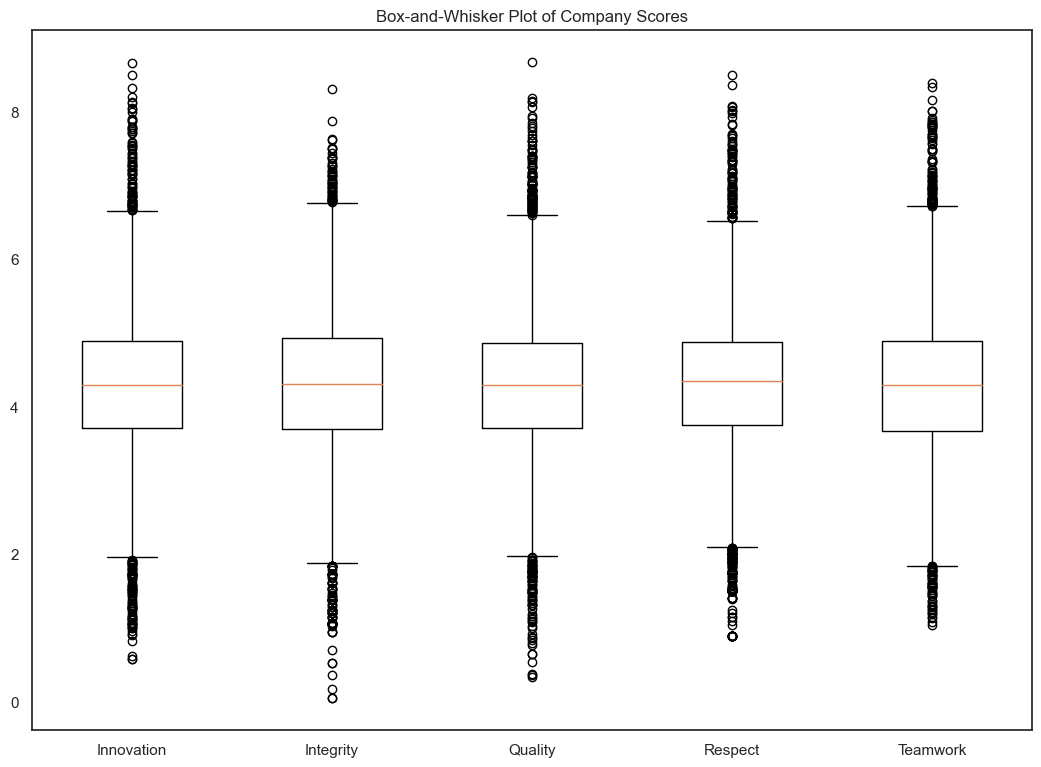

In [635]:
# Creating dataset
np.random.seed(10)

data = [innovation, integrity, quality, respect, teamwork]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

# Adding x-axis labels
ax.set_xticklabels(['Innovation', 'Integrity', 'Quality', 'Respect', 'Teamwork'])

# Adding title 
plt.title("Box-and-Whisker Plot of Company Scores")

# show plot
plt.show()

## Standard Scaler

### Test Distributions

#### One-Way ANOVA

In [616]:
# Perform One-Way ANOVA
f_statistic, p_value = f_oneway(final_scores['innovation'], final_scores['integrity'], final_scores['quality'], final_scores['respect'], final_scores['teamwork'])

print(f"F-Statistic: {f_statistic.round(3)}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")


F-Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis: No significant difference between group means.


#### Anderson-Darling Test

In [617]:
# Combine all groups into a single list
all_groups = [final_scores['innovation'], final_scores['integrity'], final_scores['quality'], final_scores['respect'], final_scores['teamwork']]

# Perform Anderson-Darling Test
ad_statistic, critical_values, significance_level = anderson_ksamp(all_groups)

print(f"AD-Statistic: {ad_statistic.round(3)}")
print(f"Significance Level: {significance_level}")

if significance_level < 0.05:
    print("Reject the null hypothesis: The distributions are not the same.")
else:
    print("Fail to reject the null hypothesis: The distributions are the same.")


AD-Statistic: 3.047
Significance Level: 0.01143900577202739
Reject the null hypothesis: The distributions are not the same.


#### Permutations Test (Pairwise)

In [618]:
def permutation_test_pairwise(data, num_permutations=1000):
    groups = data.columns
    results = []

    for (group1, group2) in combinations(groups, 2):
        observed_statistic = np.mean(data[group1]) - np.mean(data[group2])
        
        combined = np.concatenate([data[group1], data[group2]])
        permuted_statistics = []

        for _ in range(num_permutations):
            permuted = np.random.permutation(combined)
            perm_group1 = permuted[:len(data[group1])]
            perm_group2 = permuted[len(data[group1]):]
            perm_statistic = np.mean(perm_group1) - np.mean(perm_group2)
            permuted_statistics.append(perm_statistic)

        permuted_statistics = np.array(permuted_statistics)
        p_value = np.sum(permuted_statistics >= observed_statistic) / num_permutations

        results.append({
            'Group1': group1,
            'Group2': group2,
            'Observed_Statistic': observed_statistic,
            'P_Value': p_value
        })

    return pd.DataFrame(results)

# Perform the pairwise permutation test
results = permutation_test_pairwise(final_scores)
print(results)

       Group1     Group2  Observed_Statistic  P_Value
0  innovation  integrity        8.881784e-16    0.474
1  innovation    quality        1.776357e-15    0.492
2  innovation    respect        8.881784e-16    0.489
3  innovation   teamwork        8.881784e-16    0.492
4   integrity    quality        8.881784e-16    0.522
5   integrity    respect        0.000000e+00    0.515
6   integrity   teamwork        0.000000e+00    0.507
7     quality    respect       -8.881784e-16    0.493
8     quality   teamwork       -8.881784e-16    0.480
9     respect   teamwork        0.000000e+00    0.506


#### Permutations Test (Overall)

In [619]:
def overall_permutation_test(data, num_permutations=1000):
    groups = data.columns
    all_data = np.concatenate([data[col] for col in groups])
    observed_statistic = np.var([np.mean(data[col]) for col in groups])

    permuted_statistics = []
    for _ in range(num_permutations):
        permuted = np.random.permutation(all_data)
        permuted_means = [np.mean(permuted[i*len(data): (i+1)*len(data)]) for i in range(len(groups))]
        perm_statistic = np.var(permuted_means)
        permuted_statistics.append(perm_statistic)

    permuted_statistics = np.array(permuted_statistics)
    p_value = np.sum(permuted_statistics >= observed_statistic) / num_permutations

    return observed_statistic, p_value

# Perform the overall permutation test
observed_stat, p_val = overall_permutation_test(final_scores)

print(f"Observed Statistic: {observed_stat.round(3)}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: The distributions are different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between distributions.")


Observed Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis: No significant difference between distributions.


### T-Test

In [620]:
for i in final_scores.columns:
    for j in final_scores.columns:
        if i != j:
            print(f"Comparing {i} and {j}")
            print(stats.ttest_ind(final_scores[i], final_scores[j]))

Comparing innovation and integrity
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing innovation and quality
TtestResult(statistic=9.082031504564878e-14, pvalue=0.9999999999999276, df=10456.0)
Comparing innovation and respect
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing innovation and teamwork
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing integrity and innovation
TtestResult(statistic=-4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing integrity and quality
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing integrity and respect
TtestResult(statistic=0.0, pvalue=1.0, df=10456.0)
Comparing integrity and teamwork
TtestResult(statistic=0.0, pvalue=1.0, df=10456.0)
Comparing quality and innovation
TtestResult(statistic=-9.082031504564878e-14, pvalue=0.9999999999999276, df=10456.0)
Comparin

### Correlation Matrix

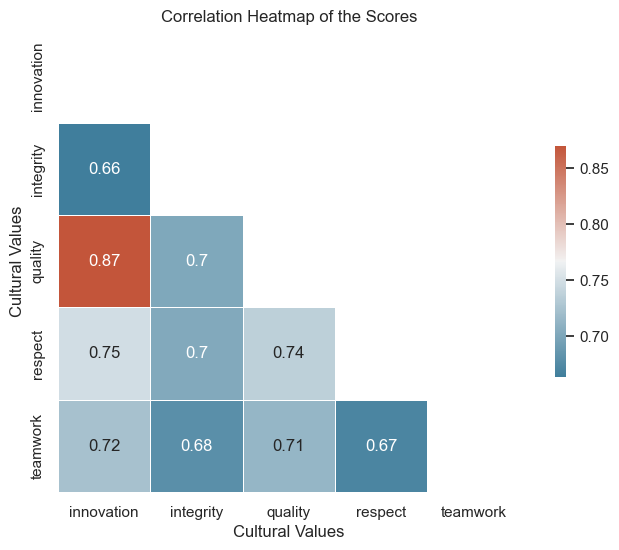

In [631]:
# check correlation between features
# Compute the correlation matrix
corr_num = final_scores.corr()
# Set up the matplotlib figure
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(9,6))

# Generate a heatmap of the correlation matrix
mask = np.triu(np.ones_like(corr_num, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_num, mask = mask, cmap=cmap ,annot=True, ax=ax, linewidths=.5, square = True, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of the Scores')
plt.xlabel('Cultural Values')
plt.ylabel('Cultural Values')

plt.show()

## Standard and MinMax Scaler

In [622]:
# Define the scores
scores_minmax = log_scores_clipped_stand_minmax.copy()
final_scores_minmax = scores_minmax.drop(columns=['tickers'])

# Each cultural value as an array
innovation_minmax = final_scores_minmax['innovation'].values
integrity_minmax = final_scores_minmax['integrity'].values
quality_minmax = final_scores_minmax['quality'].values
respect_minmax = final_scores_minmax['respect'].values
teamwork_minmax = final_scores_minmax['teamwork'].values

# Dictionary of the scores
final_scores_dict = {
    'innovation': innovation_minmax, 
    'integrity': integrity_minmax, 
    'quality': quality_minmax, 
    'respect': respect_minmax, 
    'teamwork': teamwork_minmax
    }

### Test Distributions

#### One-Way ANOVA

In [623]:
# Perform One-Way ANOVA
f_statistic, p_value = f_oneway(final_scores_minmax['innovation'], final_scores_minmax['integrity'], final_scores_minmax['quality'], final_scores_minmax['respect'], final_scores_minmax['teamwork'])

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")


F-Statistic: 266.2388326686715
P-Value: 1.1071228752711226e-224
Reject the null hypothesis: At least one group mean is different.


#### Anderson-Darling Test

In [624]:
# Combine all groups into a single list
all_groups = [final_scores_minmax['innovation'], final_scores_minmax['integrity'], final_scores_minmax['quality'], final_scores_minmax['respect'], final_scores_minmax['teamwork']]

# Perform Anderson-Darling Test
ad_statistic, critical_values, significance_level = anderson_ksamp(all_groups)

print(f"AD-Statistic: {ad_statistic}")
print(f"Significance Level: {significance_level}")

if significance_level < 0.05:
    print("Reject the null hypothesis: The distributions are not the same.")
else:
    print("Fail to reject the null hypothesis: The distributions are the same.")


AD-Statistic: 402.7444538634456
Significance Level: 0.001
Reject the null hypothesis: The distributions are not the same.


/var/folders/4s/l03qpvb919z5_79mtc8gl9000000gn/T/ipykernel_39234/4189346382.py:5: UserWarning: p-value floored: true value smaller than 0.001
  ad_statistic, critical_values, significance_level = anderson_ksamp(all_groups)


#### Permutations Test (Pairwise)

In [625]:
def permutation_test_pairwise(data, num_permutations=1000):
    groups = data.columns
    results = []

    for (group1, group2) in combinations(groups, 2):
        observed_statistic = np.mean(data[group1]) - np.mean(data[group2])
        
        combined = np.concatenate([data[group1], data[group2]])
        permuted_statistics = []

        for _ in range(num_permutations):
            permuted = np.random.permutation(combined)
            perm_group1 = permuted[:len(data[group1])]
            perm_group2 = permuted[len(data[group1]):]
            perm_statistic = np.mean(perm_group1) - np.mean(perm_group2)
            permuted_statistics.append(perm_statistic)

        permuted_statistics = np.array(permuted_statistics)
        p_value = np.sum(permuted_statistics >= observed_statistic) / num_permutations

        results.append({
            'Group1': group1,
            'Group2': group2,
            'Observed_Statistic': observed_statistic,
            'P_Value': p_value
        })

    return pd.DataFrame(results)

# Perform the pairwise permutation test
results = permutation_test_pairwise(final_scores_minmax)
print(results)

       Group1     Group2  Observed_Statistic  P_Value
0  innovation  integrity           -0.540210    1.000
1  innovation    quality           -0.146390    1.000
2  innovation    respect            0.125050    0.000
3  innovation   teamwork            0.167994    0.000
4   integrity    quality            0.393819    0.000
5   integrity    respect            0.665259    0.000
6   integrity   teamwork            0.708204    0.000
7     quality    respect            0.271440    0.000
8     quality   teamwork            0.314384    0.000
9     respect   teamwork            0.042944    0.065


### Permutations Test (Overall)

In [626]:
def overall_permutation_test(data, num_permutations=1000):
    groups = data.columns
    all_data = np.concatenate([data[col] for col in groups])
    observed_statistic = np.var([np.mean(data[col]) for col in groups])

    permuted_statistics = []
    for _ in range(num_permutations):
        permuted = np.random.permutation(all_data)
        permuted_means = [np.mean(permuted[i*len(data): (i+1)*len(data)]) for i in range(len(groups))]
        perm_statistic = np.var(permuted_means)
        permuted_statistics.append(perm_statistic)

    permuted_statistics = np.array(permuted_statistics)
    p_value = np.sum(permuted_statistics >= observed_statistic) / num_permutations

    return observed_statistic, p_value

# Perform the overall permutation test
observed_stat, p_val = overall_permutation_test(final_scores_minmax)

print(f"Observed Statistic: {observed_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: The distributions are different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between distributions.")


Observed Statistic: 0.06522774829882619
P-Value: 0.0
Reject the null hypothesis: The distributions are different.


### T-Test

In [627]:
for i in final_scores_minmax.columns:
    for j in final_scores_minmax.columns:
        if i != j:
            print(f"Comparing {i} and {j}")
            print(stats.ttest_ind(final_scores[i], final_scores[j]))

Comparing innovation and integrity
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing innovation and quality
TtestResult(statistic=9.082031504564878e-14, pvalue=0.9999999999999276, df=10456.0)
Comparing innovation and respect
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing innovation and teamwork
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing integrity and innovation
TtestResult(statistic=-4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing integrity and quality
TtestResult(statistic=4.541015752282439e-14, pvalue=0.9999999999999638, df=10456.0)
Comparing integrity and respect
TtestResult(statistic=0.0, pvalue=1.0, df=10456.0)
Comparing integrity and teamwork
TtestResult(statistic=0.0, pvalue=1.0, df=10456.0)
Comparing quality and innovation
TtestResult(statistic=-9.082031504564878e-14, pvalue=0.9999999999999276, df=10456.0)
Comparin

### Correlation Matrix

<Axes: >

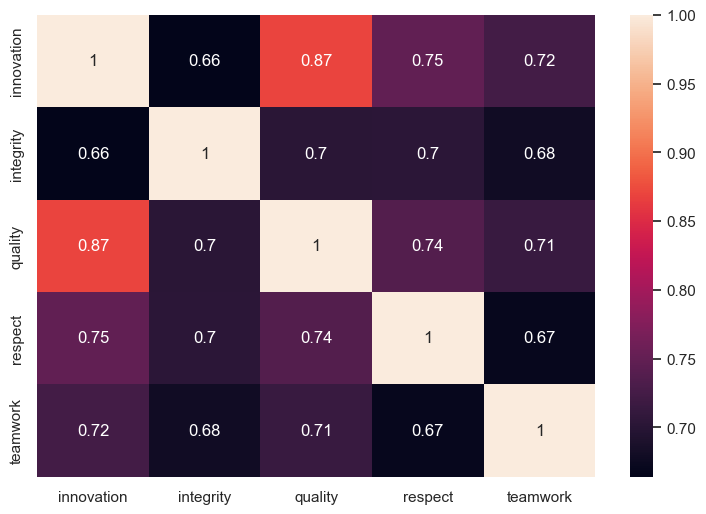

In [628]:
# check correlation between features
# Compute the correlation matrix
corr_num = final_scores_minmax.corr()
# Set up the matplotlib figure
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(figsize=(9,6))
# Generate a heatmap of the correlation matrix
sns.heatmap(corr_num, cmap="rocket", annot=True, ax=ax)